# Plot Inverse Variances of Data and Model

In [26]:
import argparse
import numpy as np
import os
import sys
import h5py

import astropy.units as u

sys.path.append("/users/pkeller/code/ClosureSim/skysim")
from vis import VisData

%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import interact

 ## Load Data

In [31]:
# data directory
ddir = "/lustre/aoc/projects/hera/pkeller/data/H1C_IDR3.2/sample/"

# triad names
trname = "EQ14"

eicp_model_xx = []
eicp_model_yy = []
eicp_data_xx = []
eicp_data_yy = []
lst = []

for fname in ["A", "B", "C"]:
    name = f"{trname}_F{fname}"
    path = os.path.join(ddir, f"{name}_B2_AVG.h5")

    with h5py.File(path, "r") as f:
        eicp_model_xx.append(np.nanmean(f[f"eicp XX (2) model"][()], axis=1))
        eicp_model_yy.append(np.nanmean(f[f"eicp YY (2) model"][()], axis=1))
        eicp_data_xx.append(np.nanmean(f[f"eicp XX (2)"][()], axis=1))
        eicp_data_yy.append(np.nanmean(f[f"eicp YY (2)"][()], axis=1))
        lst.append(f["LST"][()])
        frq = f["FRQ"][()]


eicp_model_xx = np.concatenate(eicp_model_xx, axis=1)
eicp_model_yy = np.concatenate(eicp_model_yy, axis=1)
eicp_data_xx = np.concatenate(eicp_data_xx, axis=1)
eicp_data_yy = np.concatenate(eicp_data_yy, axis=1)
lst = np.hstack(lst)

/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


## Compute RMS

In [16]:
deicp_model_xx = eicp_model_xx[1] - eicp_model_xx[0]
deicp_model_yy = eicp_model_yy[1] - eicp_model_yy[0]
deicp_data_xx = eicp_data_xx[1] - eicp_data_xx[0]
deicp_data_yy = eicp_data_yy[1] - eicp_data_yy[0]

var_model_xx = np.nanvar(deicp_model_xx, axis=-1)
var_model_yy = np.nanvar(deicp_model_yy, axis=-1)
var_data_xx = np.nanvar(deicp_data_xx, axis=-1)
var_data_yy = np.nanvar(deicp_data_yy, axis=-1)

/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Degrees of freedom <= 0 for slice.
  
/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Degrees of freedom <= 0 for slice.
  import sys
/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Degrees of freedom <= 0 for slice.
  
/lustre/aoc/projects/hera/pkeller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Degrees of freedom <= 0 for slice.
  if __name__ == '__main__':


## Plot

<IPython.core.display.Javascript object>


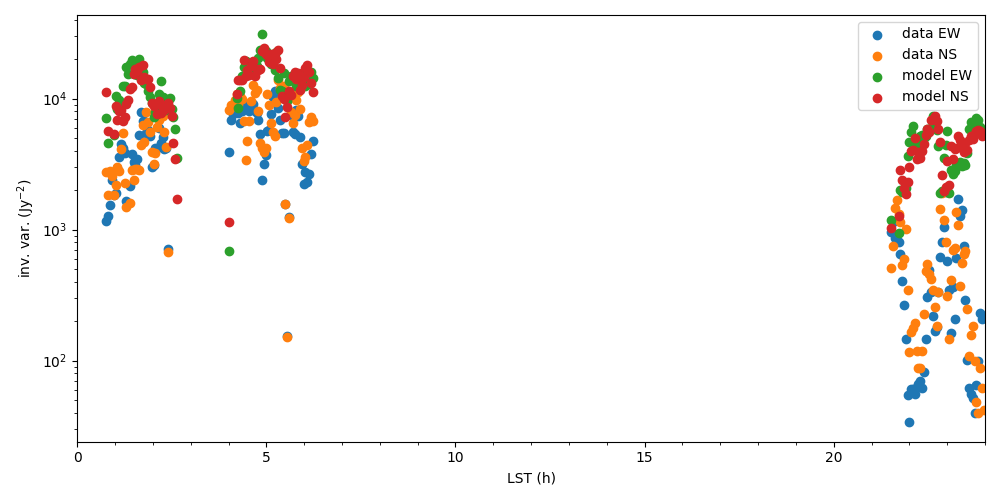

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(lst, var_data_xx**-1, label="data EW")
ax.scatter(lst, var_data_yy**-1, label="data NS")
ax.scatter(lst, var_model_xx**-1, label="model EW")
ax.scatter(lst, var_model_yy**-1, label="model NS")

ax.set_xlabel("LST (h)")
ax.set_ylabel(r"inv. var. (Jy$^{-2}$)")
ax.set_xlim([0, 24])
ax.legend()
ax.set_yscale("log")
plt.tight_layout()
plt.minorticks_on()